# Forecasting - Time Series

#### Build a forecast model for plastic manufacturing company's monthly sales data in the year 1949 to 1953. Also forecast on the data for next 1 year.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
manuf_df = pd.read_csv(r"D:\360digi\DS\Sharath\Forecasting_3_Smoothing\handson\Datasets_Forecasting-3\PlasticSales.csv")
manuf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
manuf_df.head(15)

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


<AxesSubplot:>

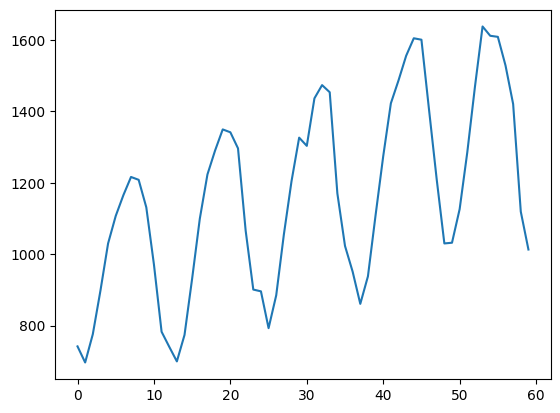

In [5]:
# Visualization - Time plot
manuf_df.Sales.plot()

In [ ]:
# Trend - upward

In [7]:
# Data Partition
Train = manuf_df.head(48)
Test = manuf_df.tail(12)

In [8]:
Test

,Month,Sales
48,Jan-53,1030
49,Feb-53,1032
50,Mar-53,1126
51,Apr-53,1285
52,May-53,1468
53,Jun-53,1637
54,Jul-53,1611
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420


In [9]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, actual):
    temp = np.abs((pred - actual)/actual)*100
    return np.mean(temp)

In [10]:
# Moving Average for the time series
mv_pred = manuf_df["Sales"].rolling(12).mean()
mv_pred.tail(12)

48    1290.916667
49    1305.166667
50    1320.833333
51    1335.500000
52    1351.666667
53    1369.583333
54    1380.000000
55    1384.416667
56    1378.083333
57    1363.083333
58    1339.416667
59    1323.083333
Name: Sales, dtype: float64

In [11]:
MAPE(mv_pred.tail(4), Test.Sales)

16.031890250655138

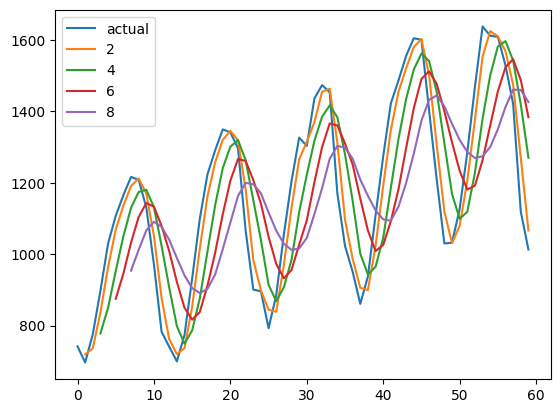

In [12]:
# Plot with Moving Averages
manuf_df.Sales.plot(label = "actual")
for i in range(2, 9, 2):
    manuf_df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 2)

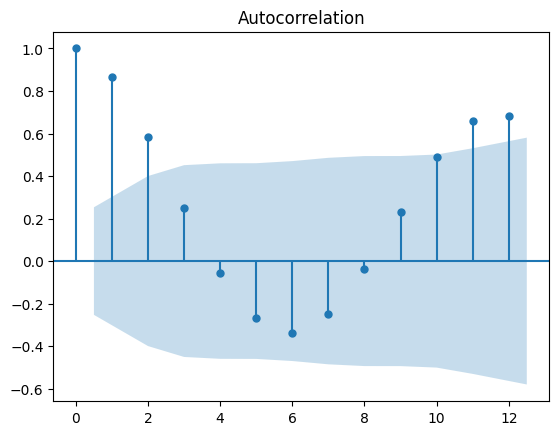

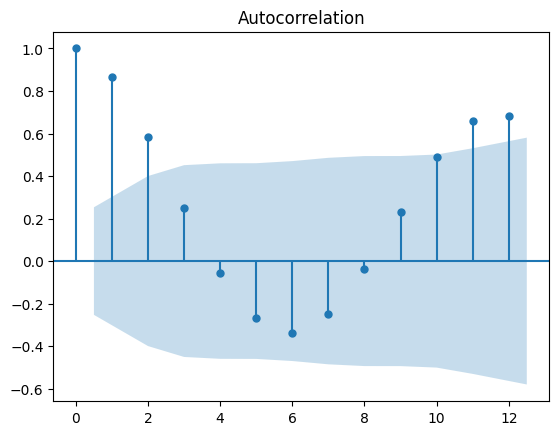

In [13]:
tsa_plots.plot_acf(manuf_df.Sales, lags = 12)

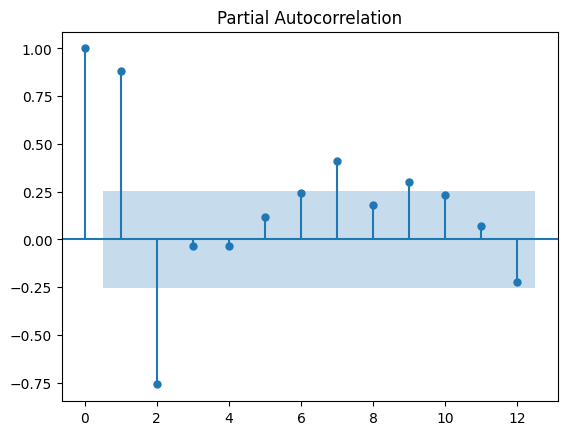

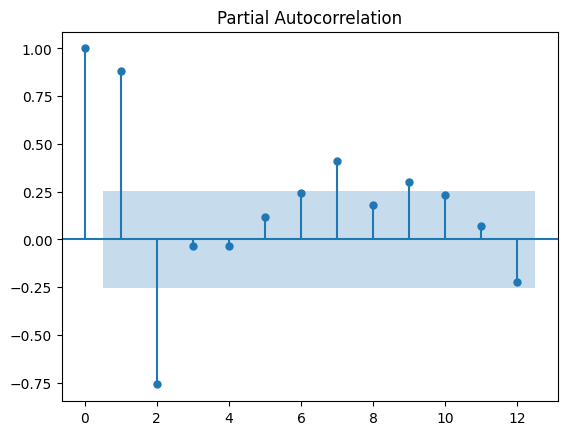

In [14]:
tsa_plots.plot_pacf(manuf_df.Sales, lags = 12)

# Forecasting models

In [15]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()

In [16]:
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
ses = MAPE(pred_ses, Test.Sales) 

In [17]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()

In [18]:
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
hw = MAPE(pred_hw, Test.Sales) 

In [19]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

In [20]:
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
hwe = MAPE(pred_hwe_add_add, Test.Sales) 

In [21]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()

In [22]:
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
hwe_w = MAPE(pred_hwe_mul_add, Test.Sales) 

In [23]:
# comparing all mape's
di = pd.Series({'Simple Exponential Method':ses, 'Holt method ':hw, 'hw_additive seasonality and additive trend':hwe, 'hw_multiplicative seasonality and additive trend':hwe_w})
mape = pd.DataFrame(di, columns=['mape'])
mape

,mape
Simple Exponential Method,17.041821
Holt method,102.407007
hw_additive seasonality and additive trend,11.725567
hw_multiplicative seasonality and additive trend,14.858773


In [24]:
# Final Model on 100% Data
model = ExponentialSmoothing(manuf_df["Sales"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

In [25]:
newdata_pred = model.predict(start = manuf_df.index[0], end = len(manuf_df) + 12 -1 )
newdata_pred

0      748.401434
1      686.322512
2      783.456574
3      928.465474
4     1056.957395
         ...     
67    1491.821994
68    1489.684981
69    1439.756909
70    1204.706819
71    1044.979912
Length: 72, dtype: float64

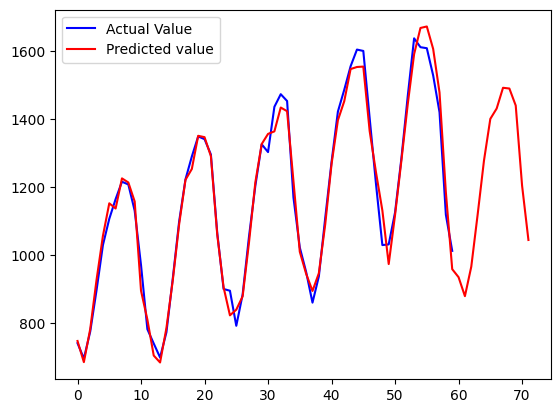

In [26]:
fig, ax = plt.subplots()
ax.plot(manuf_df.Sales, '-b', label = 'Actual Value')
ax.plot(newdata_pred, '-r', label = 'Predicted value')
ax.legend();
plt.show()